( 시계열 데이터 다루기 )  
-. 타임스탬프 -> 특정 시점  
-. 시간 간격과 기간 -> 특정 시작점과 종료점 사이의 시간,  
기간은 일반적으로 각 간격이 일정하고 서로 겹치지 않는 특별한 경우의 시간 간격  
-. 시간 델타(time delta)나 지속 기간(duration)은 정확한 시간 길이  

In [21]:
# 기본 라이브러리 불러오기

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

In [22]:
df = pd.read_csv('BicycleWeather.csv')
df2 = pd.read_csv('FremontBridge.csv')
df.head()

,STATION,STATION_NAME,DATE,PRCP,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,...,WT17,WT05,WT02,WT22,WT04,WT13,WT16,WT08,WT18,WT03
0,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20120101,0,0,0,128,50,47,100,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
1,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20120102,109,0,0,106,28,45,180,...,-9999,-9999,-9999,-9999,-9999,1,1,-9999,-9999,-9999
2,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20120103,8,0,0,117,72,23,180,...,-9999,-9999,-9999,-9999,-9999,-9999,1,-9999,-9999,-9999
3,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20120104,203,0,0,122,56,47,180,...,-9999,-9999,-9999,-9999,-9999,1,1,-9999,-9999,-9999
4,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20120105,13,0,0,89,28,61,200,...,-9999,-9999,-9999,-9999,-9999,-9999,1,-9999,-9999,-9999


In [23]:
df2.head()

,Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,10/03/2012 12:00:00 AM,9.0,4.0
1,10/03/2012 01:00:00 AM,6.0,4.0
2,10/03/2012 02:00:00 AM,1.0,1.0
3,10/03/2012 03:00:00 AM,3.0,2.0
4,10/03/2012 04:00:00 AM,1.0,6.0


In [24]:
# df2의 'Date'컬럼을 Datetime으로 형변환시켜주고 컬럼도 새로 만들어줘
df2['Datetime'] = pd.to_datetime(df2['Date'])

In [25]:
df2

,Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,Datetime
0,10/03/2012 12:00:00 AM,9.0,4.0,2012-10-03 00:00:00
1,10/03/2012 01:00:00 AM,6.0,4.0,2012-10-03 01:00:00
2,10/03/2012 02:00:00 AM,1.0,1.0,2012-10-03 02:00:00
3,10/03/2012 03:00:00 AM,3.0,2.0,2012-10-03 03:00:00
4,10/03/2012 04:00:00 AM,1.0,6.0,2012-10-03 04:00:00
...,...,...,...,...
53275,10/31/2018 07:00:00 PM,23.0,58.0,2018-10-31 19:00:00
53276,10/31/2018 08:00:00 PM,16.0,31.0,2018-10-31 20:00:00
53277,10/31/2018 09:00:00 PM,15.0,19.0,2018-10-31 21:00:00
53278,10/31/2018 10:00:00 PM,12.0,15.0,2018-10-31 22:00:00


In [26]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53280 entries, 0 to 53279
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Date                          53280 non-null  object        
 1   Fremont Bridge East Sidewalk  53271 non-null  float64       
 2   Fremont Bridge West Sidewalk  53271 non-null  float64       
 3   Datetime                      53280 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 1.6+ MB


In [27]:
df2 = df2.drop(['Date'], axis=1) # Date 컬럼 지워주기
df2.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,Datetime
0,9.0,4.0,2012-10-03 00:00:00
1,6.0,4.0,2012-10-03 01:00:00
2,1.0,1.0,2012-10-03 02:00:00
3,3.0,2.0,2012-10-03 03:00:00
4,1.0,6.0,2012-10-03 04:00:00


In [28]:
# Datetime 열에서 시, 일, 월, 년, 요일로 쪼개주기

df2['Hour'] = df2['Datetime'].dt.hour
df2['Day'] = df2['Datetime'].dt.day
df2['Month'] = df2['Datetime'].dt.month
df2['Year'] = df2['Datetime'].dt.year
df2['Dayname'] = df2['Datetime'].dt.day_name()

In [29]:
df2.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,Datetime,Hour,Day,Month,Year,Dayname
0,9.0,4.0,2012-10-03 00:00:00,0,3,10,2012,Wednesday
1,6.0,4.0,2012-10-03 01:00:00,1,3,10,2012,Wednesday
2,1.0,1.0,2012-10-03 02:00:00,2,3,10,2012,Wednesday
3,3.0,2.0,2012-10-03 03:00:00,3,3,10,2012,Wednesday
4,1.0,6.0,2012-10-03 04:00:00,4,3,10,2012,Wednesday


In [30]:
df2[df2.isnull().any(axis=1)]  # null값 있는 것만 다 찾아줘

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,Datetime,Hour,Day,Month,Year,Dayname
6105,NaN,NaN,2013-06-14 09:00:00,9,14,6,2013,Friday
6106,NaN,NaN,2013-06-14 10:00:00,10,14,6,2013,Friday
12530,NaN,NaN,2014-03-09 02:00:00,2,9,3,2014,Sunday
21266,NaN,NaN,2015-03-08 02:00:00,2,8,3,2015,Sunday
22331,NaN,NaN,2015-04-21 11:00:00,11,21,4,2015,Tuesday
22332,NaN,NaN,2015-04-21 12:00:00,12,21,4,2015,Tuesday
30170,NaN,NaN,2016-03-13 02:00:00,2,13,3,2016,Sunday
38906,NaN,NaN,2017-03-12 02:00:00,2,12,3,2017,Sunday
47642,NaN,NaN,2018-03-11 02:00:00,2,11,3,2018,Sunday


In [1]:
# Dayname, Hour 컬럼을 기준으로 Groupby해주고, 평균으로 null값들 채워줘
df2['Fremont Bridge West Sidewalk'].fillna(df2.groupby(["Dayname", "Hour"])["Fremont Bridge West Sidewalk"].transform(np.mean), inplace=True)
df2['Fremont Bridge East Sidewalk'].fillna(df2.groupby(["Dayname", "Hour"])["Fremont Bridge East Sidewalk"].transform(np.mean), inplace=True)

NameError: name 'df2' is not defined

In [36]:
df2[df2.isnull().any(axis=1)]  # null값 있는 것만 다 찾아줘

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,Datetime,Hour,Day,Month,Year,Dayname


In [37]:
# 이름이 너무 기니까 각각 East, West로 이름 바꿔줘
df2.rename({'Fremont Bridge East Sidewalk': 'East', 'Fremont Bridge West Sidewalk': 'West'}, axis=1, inplace=True)

In [39]:
df2.head()

,East,West,Datetime,Hour,Day,Month,Year,Dayname
0,9.0,4.0,2012-10-03 00:00:00,0,3,10,2012,Wednesday
1,6.0,4.0,2012-10-03 01:00:00,1,3,10,2012,Wednesday
2,1.0,1.0,2012-10-03 02:00:00,2,3,10,2012,Wednesday
3,3.0,2.0,2012-10-03 03:00:00,3,3,10,2012,Wednesday
4,1.0,6.0,2012-10-03 04:00:00,4,3,10,2012,Wednesday


평균 그래프 그려볼까?

<AxesSubplot:xlabel='Hour'>

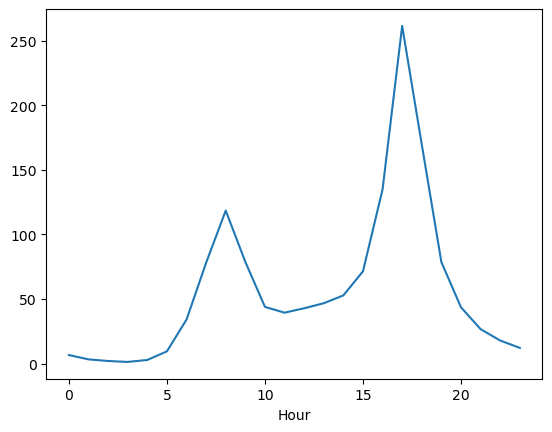

In [41]:
# 시간 평균 기준으로 East 값인 애들 그려줘
df2.groupby('Hour').mean()['East'].plot()

<AxesSubplot:xlabel='Day'>

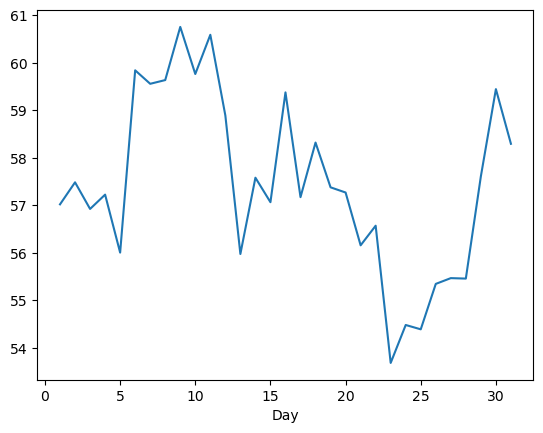

In [43]:
# '일' 평균 기준으로 East값인 애들 그려줘
df2.groupby('Day').mean()['East'].plot()

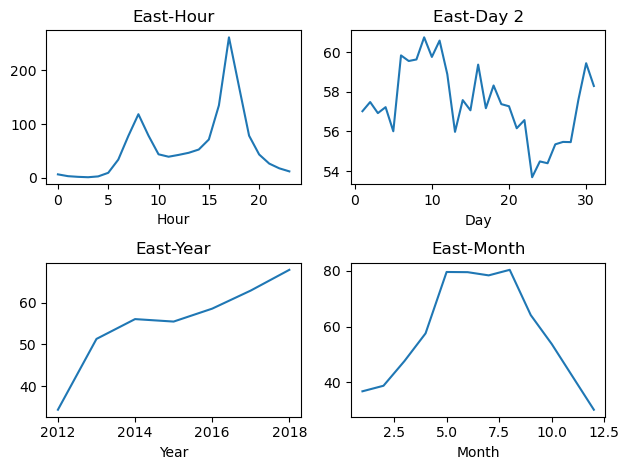

In [46]:
# 같은 방식으로 Month도 그려야 되고 Year도 그려야 되는데
# 그리기 귀찮으니 4개 한꺼번에 그려줘

plt.subplot(221)
df2.groupby('Hour').mean()['East'].plot()
plt.title("East-Hour")

plt.subplot(222)
df2.groupby('Day').mean()['East'].plot()
plt.title("East-Day 2")

plt.subplot(223)
df2.groupby('Year').mean()['East'].plot()
plt.title("East-Year")

plt.subplot(224)
df2.groupby('Month').mean()['East'].plot()
plt.title("East-Month")

plt.tight_layout()
plt.show()

1. Hour 
- 사람들이 오전 8시~9시 사이에 자전거를 많이 타는구나
- 사람들이 또 오후 18시~19시 사이에 자전거를 많이 타는구나
  - 출근길에 자전거를 많이 타는 경향

2. Day (30일 기준으로)
- 매 달 10일 전후로 자전거를 제일 많이 타고
- 매 달 22일 쯤에 자전거를 제일 많이 안 타네?
  - 무슨 이유인지는 모르겠다...

3. Year
- 2012년부터 2018년까지 자전거 타는 사람이 많아지는 추세가 보인다.
  - 자기 관리 열풍 때문에 그런건가? 아니면 다른 이유가 있을까?

4. Month
- 9월 ~ 2월까지 자전거 이용률이 감소하다가
- 2.5월을 기준으로 9월까지 이용률이 오르는 추세가 보인다.
- 날씨의 영향도 이용량과 연관이 충분히 있을 것 같다


